In [41]:
import os
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sys
sys.path.append("../../../src")
from scipy.fft import fft
from FeaturesExtractorFromTSD import create_feature_dict_from_tsd
import matplotlib.pyplot as plt
import statistics
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from   scipy.stats import norm
from   scipy.special import logsumexp
from numpy import inf

In [27]:
path_tds_angles = '../../../results/big_dataset/TSD_angles'
folders = [x[0] for x in os.walk(path_tds_angles)]
folders.remove(path_tds_angles)

In [28]:
def smooth_time_series(time_series, window_size):
    smoothed_series = []
    for i in range(len(time_series)):
        lower_bound = max(0, i - window_size)
        upper_bound = min(len(time_series), i + window_size + 1)
        window = time_series[lower_bound:upper_bound]
        average = sum(window) / len(window)
        smoothed_series.append(average)
    return smoothed_series

In [29]:
paths_to_csv = {}

In [30]:
for folder in folders:
    video_name = folder.split('\\')[-1]
    curr_paths_to_csv = [(f[:-4], os.path.join(folder, f)) for f in listdir(folder)]
    paths_to_csv[video_name] = curr_paths_to_csv

In [31]:
names_of_videos = [v for v in paths_to_csv.keys() ]
names_of_videos.sort(key=lambda v: v[::-1])

In [32]:
names_of_videos

['S001C',
 'S002C',
 'S007C',
 'S008C',
 'S009C',
 'S002I',
 'S003I',
 'S005I',
 'S007I',
 'S009I',
 'S001S',
 'S002S',
 'S004S',
 'S007S',
 'S009S']

In [33]:
bow_moving = []
titles = []

In [34]:
for i in range(len(names_of_videos)):
    curr_metric, curr_path = paths_to_csv[names_of_videos[i]][0]
    print(curr_path)
    print(curr_metric)
    title = curr_path.split('/')[-1].split('\\')[1]
    titles.append(title)
    print(title)
    angles = pd.read_csv(curr_path)['angle'].to_list()
    bow_moving.append(angles)

../../../results/big_dataset/TSD_angles\S001C\angl_bow_mov.csv
angl_bow_mov
S001C
../../../results/big_dataset/TSD_angles\S002C\angl_bow_mov.csv
angl_bow_mov
S002C
../../../results/big_dataset/TSD_angles\S007C\angl_bow_mov.csv
angl_bow_mov
S007C
../../../results/big_dataset/TSD_angles\S008C\angl_bow_mov.csv
angl_bow_mov
S008C
../../../results/big_dataset/TSD_angles\S009C\angl_bow_mov.csv
angl_bow_mov
S009C
../../../results/big_dataset/TSD_angles\S002I\angl_bow_mov.csv
angl_bow_mov
S002I
../../../results/big_dataset/TSD_angles\S003I\angl_bow_mov.csv
angl_bow_mov
S003I
../../../results/big_dataset/TSD_angles\S005I\angl_bow_mov.csv
angl_bow_mov
S005I
../../../results/big_dataset/TSD_angles\S007I\angl_bow_mov.csv
angl_bow_mov
S007I
../../../results/big_dataset/TSD_angles\S009I\angl_bow_mov.csv
angl_bow_mov
S009I
../../../results/big_dataset/TSD_angles\S001S\angl_bow_mov.csv
angl_bow_mov
S001S
../../../results/big_dataset/TSD_angles\S002S\angl_bow_mov.csv
angl_bow_mov
S002S
../../../results

# Try correlation

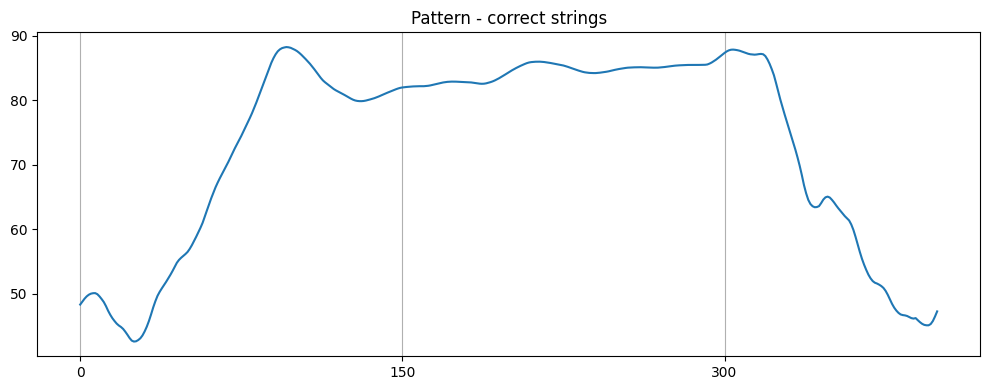

In [39]:
fig, ax = plt.subplots(figsize=(10, 4))
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 6400, 150))
ax.xaxis.grid(True)
ax.set_title('Pattern - correct strings')
ax.plot(smooth_time_series(bow_moving[2][450:850], 10));
plt.tight_layout()
plt.savefig("pattern_correct_str.png")

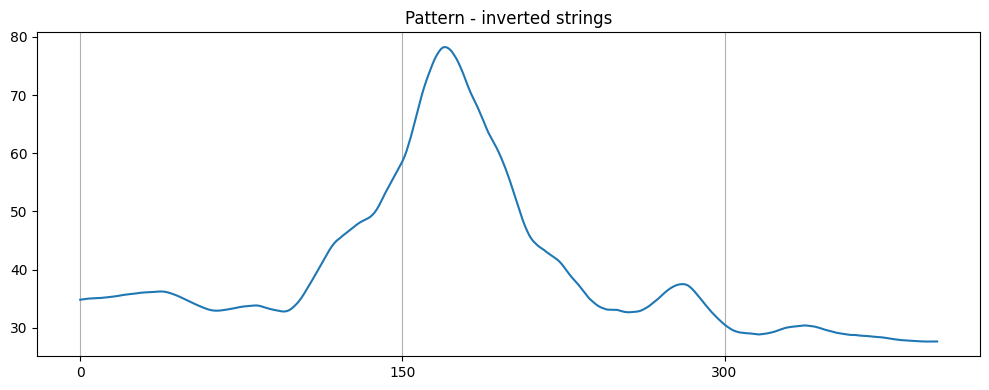

In [40]:
fig, ax = plt.subplots(figsize=(10, 4))
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 6400, 150))
ax.xaxis.grid(True)
ax.set_title('Pattern - inverted strings')
ax.plot(smooth_time_series(bow_moving[8][4750:5150], 10));
plt.tight_layout()
plt.savefig("pattern_inverted_str.png")

In [37]:
pattern_correct = bow_moving[2][450:850]
#pattern_inverted = bow_moving[5][4600:4800]
pattern_inverted = bow_moving[8][4750:5150]

In [38]:
def normalize(data):
    data = np.array(smooth_time_series(data, 10))
    return (data - data.mean())/data.std()*10

def num_correlation_points(data, templates):
    correlations = set()
    for template in templates:
        data = normalize(data)
        template  = normalize(template)
        corr_res = np.correlate(data, template,mode='valid')
        th=20000
        #plt.figure(figsize=(40,5))
        #plt.subplot(211)
        #plt.plot(data)
        #plt.subplot(212)
        #plt.plot(corr_res)
        #print(max(corr_res))
        #print(min(corr_res))
        #plt.plot(np.arange(len(corr_res))[corr_res > th],corr_res[corr_res > th],'ro')
        correlations.update(set(10*np.around(corr_res[corr_res > th]/10)))
        #print(len(correlations))
        plt.show()
    return len(correlations)

In [282]:
for i in range(len(bow_moving)):
    print(titles[i])
    if num_correlation_points(bow_moving[i], [ pattern_correct, ]) > 500:
        print('Correct')
    elif num_correlation_points(bow_moving[i], [ pattern_inverted, ]) > 500:
        print('Inverted')
    else:
        print('Shuffled')
    print('------------')

S001C
Correct
------------
S002C
Correct
------------
S007C
Correct
------------
S008C
Correct
------------
S009C
Correct
------------
S002I
Inverted
------------
S003I
Inverted
------------
S005I
Inverted
------------
S007I
Inverted
------------
S009I
Inverted
------------
S001S
Shuffled
------------
S002S
Shuffled
------------
S004S
Shuffled
------------
S007S
Shuffled
------------
S009S
Shuffled
------------
